# NSE Stock Prediction using Recurrent Neural Network and LSTM

# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the training set

dataset_train = pd.read_csv('C:/Users/akshaf/Documents/Final Project/ICICI_Train.csv')

In [3]:
dataset_train.head()

,SYMBOL,SERIES,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN
0,ICICIBANK,EQ,1/1/2016,261.30,263.60,258.00,263.00,262.55,261.35,5452815,1.424922e+09,36204,INE090A01021
1,ICICIBANK,EQ,1/4/2016,261.00,261.35,254.65,255.55,256.00,263.00,8577993,2.202167e+09,65648,INE090A01021
2,ICICIBANK,EQ,1/5/2016,256.25,257.50,251.70,256.70,257.05,255.55,8151798,2.079172e+09,69866,INE090A01021
3,ICICIBANK,EQ,1/6/2016,255.40,256.75,249.20,250.10,250.20,256.70,15832892,3.996941e+09,104952,INE090A01021
4,ICICIBANK,EQ,1/7/2016,246.40,247.70,243.10,246.75,247.10,250.10,16582466,4.066715e+09,111225,INE090A01021


In [4]:
dataset_train.tail()

,SYMBOL,SERIES,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN
448,ICICIBANK,EQ,10/25/2017,293.20,310.80,284.35,305.70,305.35,266.55,123615362,3.654484e+10,450599,INE090A01021
449,ICICIBANK,EQ,10/26/2017,299.80,314.65,295.00,299.25,297.10,305.70,43256025,1.303143e+10,303766,INE090A01021
450,ICICIBANK,EQ,10/27/2017,291.90,305.45,285.50,301.15,302.25,299.25,36889009,1.101038e+10,249200,INE090A01021
451,ICICIBANK,EQ,10/30/2017,298.60,308.45,295.25,300.55,300.65,301.15,38047961,1.151838e+10,208052,INE090A01021
452,ICICIBANK,EQ,10/31/2017,300.25,303.25,298.30,300.10,300.00,300.55,19050731,5.730432e+09,102848,INE090A01021


In [5]:
dataset_train.shape

(453, 13)

In [6]:
dataset_train.isnull().sum()

SYMBOL         0
SERIES         0
TIMESTAMP      0
OPEN           0
HIGH           0
LOW            0
CLOSE          0
LAST           0
PREVCLOSE      0
TOTTRDQTY      0
TOTTRDVAL      0
TOTALTRADES    0
ISIN           0
dtype: int64

In [7]:
dataset_train['SERIES'] = dataset_train['SERIES'].fillna(dataset_train.SERIES.mode())
dataset_train.isnull().sum()

SYMBOL         0
SERIES         0
TIMESTAMP      0
OPEN           0
HIGH           0
LOW            0
CLOSE          0
LAST           0
PREVCLOSE      0
TOTTRDQTY      0
TOTTRDVAL      0
TOTALTRADES    0
ISIN           0
dtype: int64

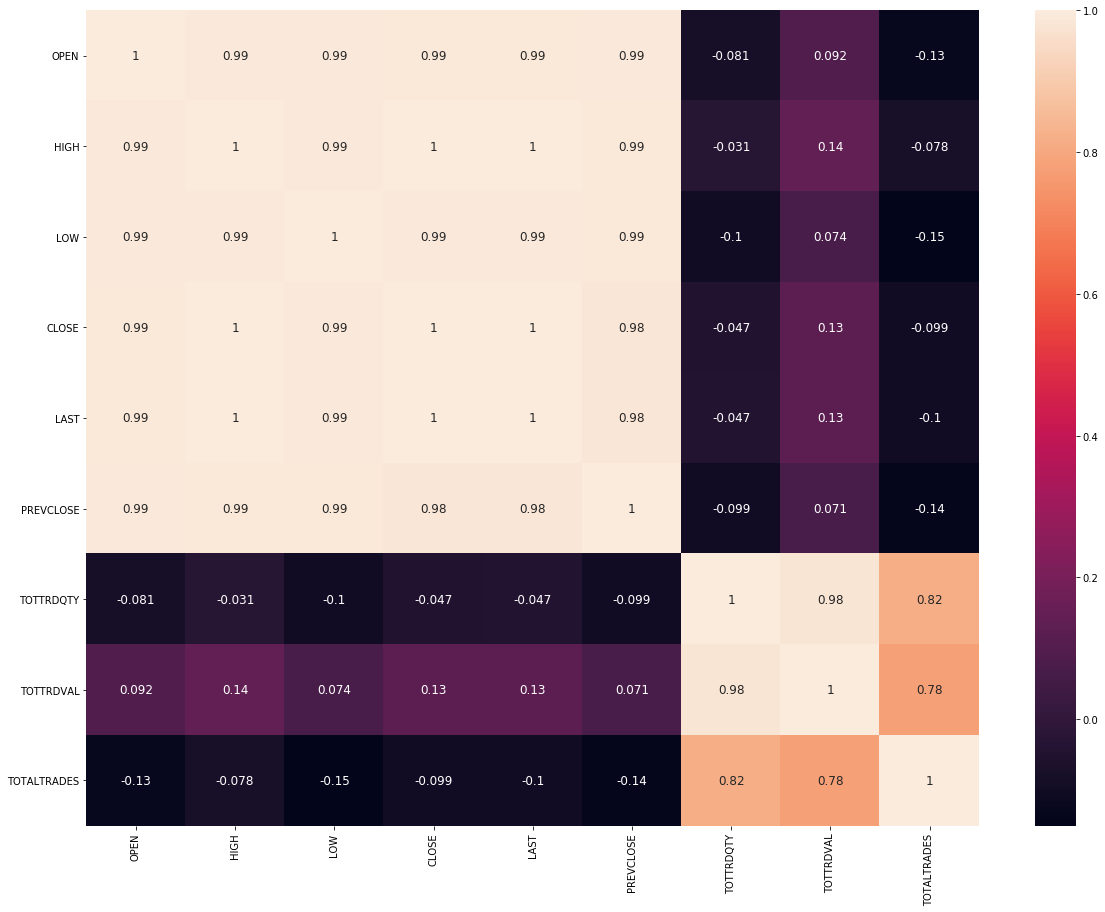

In [8]:
corr = dataset_train.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values,annot = True, 
            annot_kws = {'size' : 12})
heat_map = plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [9]:
dataset_train.drop(['TOTTRDQTY','TOTTRDVAL','TOTALTRADES','ISIN','SYMBOL','SERIES'],axis=1, inplace=True)
dataset_train.head()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE
0,1/1/2016,261.30,263.60,258.00,263.00,262.55,261.35
1,1/4/2016,261.00,261.35,254.65,255.55,256.00,263.00
2,1/5/2016,256.25,257.50,251.70,256.70,257.05,255.55
3,1/6/2016,255.40,256.75,249.20,250.10,250.20,256.70
4,1/7/2016,246.40,247.70,243.10,246.75,247.10,250.10


In [10]:
dataset_train.shape

(453, 7)

In [11]:
training_set = dataset_train.iloc[:, 1:2].values #.values is used to convert dataframe values into numpy array values
training_set

array([[261.3 ],
       [261.  ],
       [256.25],
       [255.4 ],
       [246.4 ],
       [244.5 ],
       [241.9 ],
       [241.  ],
       [237.8 ],
       [234.2 ],
       [235.6 ],
       [224.2 ],
       [224.65],
       [224.9 ],
       [228.5 ],
       [232.6 ],
       [235.95],
       [238.  ],
       [238.55],
       [219.  ],
       [227.  ],
       [218.  ],
       [207.  ],
       [206.4 ],
       [205.5 ],
       [211.  ],
       [204.  ],
       [203.1 ],
       [203.75],
       [196.6 ],
       [193.9 ],
       [207.  ],
       [196.5 ],
       [193.5 ],
       [195.8 ],
       [197.5 ],
       [199.4 ],
       [189.  ],
       [187.7 ],
       [184.3 ],
       [184.8 ],
       [195.25],
       [211.7 ],
       [218.6 ],
       [221.75],
       [219.95],
       [212.8 ],
       [218.  ],
       [213.35],
       [219.  ],
       [222.8 ],
       [219.9 ],
       [230.  ],
       [228.2 ],
       [231.55],
       [234.6 ],
       [231.45],
       [234.  ],
       [223.3 

In [12]:
training_set.shape

(453, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()  # range (0,1) means the maximum value after scaling would be 1 and minimum value would be 0. 
training_set_scaled = sc.fit_transform(training_set)

In [14]:
training_set_scaled

array([[0.54378531],
       [0.54166667],
       [0.50812147],
       [0.50211864],
       [0.43855932],
       [0.42514124],
       [0.40677966],
       [0.40042373],
       [0.37782486],
       [0.35240113],
       [0.36228814],
       [0.28177966],
       [0.28495763],
       [0.28672316],
       [0.31214689],
       [0.34110169],
       [0.36475989],
       [0.37923729],
       [0.38312147],
       [0.2450565 ],
       [0.30155367],
       [0.23799435],
       [0.16031073],
       [0.15607345],
       [0.14971751],
       [0.18855932],
       [0.13912429],
       [0.13276836],
       [0.13735876],
       [0.08686441],
       [0.06779661],
       [0.16031073],
       [0.08615819],
       [0.06497175],
       [0.08121469],
       [0.09322034],
       [0.10663842],
       [0.03319209],
       [0.0240113 ],
       [0.        ],
       [0.00353107],
       [0.07733051],
       [0.19350282],
       [0.24223164],
       [0.2644774 ],
       [0.25176554],
       [0.20127119],
       [0.237

In [15]:
# Creating a data structure with 40 timesteps and 1 output

In [16]:
timesteps = 40

# Since we are using for-loop, we have to declare the variables X_train and y_train as null List.
X_train = []
y_train = []


In [17]:
for i in range(timesteps, len(dataset_train)):
    X_train.append(training_set_scaled[i-timesteps:i, 0]) # X_train will start at time i-timesteps till i. 0 is the column number.
    y_train.append(training_set_scaled[i, 0]) # y_train is the output which is at time T+1. 0 is the column number.
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train.shape
len(X_train)

413

In [19]:
y_train.shape

(413,)

In [20]:
X_train = np.reshape(X_train, (len(X_train), timesteps, 1)) # Reshaping. Keras : 3D tensor with shape (batch_size, timesteps, input_dim).

In [21]:
X_train.shape

(413, 40, 1)

In [22]:
X_train

array([[[0.54378531],
        [0.54166667],
        [0.50812147],
        ...,
        [0.03319209],
        [0.0240113 ],
        [0.        ]],

       [[0.54166667],
        [0.50812147],
        [0.50211864],
        ...,
        [0.0240113 ],
        [0.        ],
        [0.00353107]],

       [[0.50812147],
        [0.50211864],
        [0.43855932],
        ...,
        [0.        ],
        [0.00353107],
        [0.07733051]],

       ...,

       [[0.82980226],
        [0.82344633],
        [0.81497175],
        ...,
        [0.5575565 ],
        [0.7690678 ],
        [0.81567797]],

       [[0.82344633],
        [0.81497175],
        [0.81638418],
        ...,
        [0.7690678 ],
        [0.81567797],
        [0.75988701]],

       [[0.81497175],
        [0.81638418],
        [0.79378531],
        ...,
        [0.81567797],
        [0.75988701],
        [0.80720339]]])

# Part 2 - Building the RNN

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [24]:
# Initialising the RNN
regressor = Sequential()

Neurons = 50

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = Neurons, return_sequences = True, input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2)) # This will drop 20% of the neuron as recommended.

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = Neurons, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = Neurons, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = Neurons, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
413/413 [==============================] - 18s 43ms/step - loss: 0.0621
Epoch 2/50
413/413 [==============================] - 6s 14ms/step - loss: 0.0152
Epoch 3/50
413/413 [==============================] - 7s 16ms/step - loss: 0.0119
Epoch 4/50
413/413 [==============================] - 7s 16ms/step - loss: 0.0127
Epoch 5/50
413/413 [==============================] - 6s 14ms/step - loss: 0.0141
Epoch 6/50
413/413 [==============================] - 6s 16ms/step - loss: 0.0157
Epoch 7/50
413/413 [==============================] - 7s 17ms/step - loss: 0.0144
Epoch 8/50
413/413 [==============================] - 5s 13ms/step - loss: 0.0119
Epoch 9/50
413/413 [==============================] - 5s 12ms/step - loss: 0.0123
Epoch 10/50
413/413 [==============================] - 5s 12ms/step - loss: 0.0123
Epoch 11/50
413/413 [==============================] - 5s 12ms/step - loss: 0.0095
Epoch 12/50
413/413 [==========================

# Part 3 - Making the predictions

In [27]:
# Getting the real stock price from Nov-Dec 2017
dataset_test = pd.read_csv('C:/Users/akshaf/Documents/Final Project/ICICI_Test.csv')

In [28]:
dataset_test.drop(['TOTTRDQTY','TOTTRDVAL','TOTALTRADES','ISIN','SYMBOL','SERIES'],axis=1, inplace=True)

In [29]:
dataset_test.head()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TIMESTAMP
0,303.00,318.95,302.40,313.40,313.35,300.10,11/1/2017
1,313.45,320.40,311.40,316.65,316.15,313.40,11/2/2017
2,317.80,318.65,314.05,315.90,315.20,316.65,11/3/2017
3,314.80,320.25,311.65,316.10,315.50,315.90,11/6/2017
4,317.10,317.95,309.35,312.45,312.45,316.10,11/7/2017


In [30]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [31]:
real_stock_price.shape

(42, 1)

In [32]:
real_stock_price

array([[318.95],
       [320.4 ],
       [318.65],
       [320.25],
       [317.95],
       [314.  ],
       [314.8 ],
       [324.2 ],
       [321.8 ],
       [317.1 ],
       [319.6 ],
       [320.  ],
       [332.35],
       [323.9 ],
       [322.2 ],
       [322.1 ],
       [320.5 ],
       [321.05],
       [318.6 ],
       [315.35],
       [316.3 ],
       [315.8 ],
       [309.95],
       [307.5 ],
       [307.6 ],
       [305.  ],
       [306.75],
       [311.9 ],
       [312.25],
       [312.35],
       [308.4 ],
       [306.  ],
       [310.7 ],
       [312.3 ],
       [314.8 ],
       [317.85],
       [316.55],
       [319.2 ],
       [319.  ],
       [317.9 ],
       [319.2 ],
       [315.75]])

In [33]:
# Getting the predicted stock price from Nov-Dec 2017
dataset_total = pd.concat((dataset_train['OPEN'], dataset_test['OPEN']), axis = 0)

In [35]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [37]:
X_test = []

for i in range(timesteps, len(real_stock_price)+timesteps):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [38]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [39]:
predicted_stock_price

array([[297.74625],
       [299.27515],
       [302.5088 ],
       [306.9353 ],
       [309.3833 ],
       [310.42953],
       [309.08276],
       [305.60922],
       [303.8451 ],
       [304.91943],
       [305.9869 ],
       [306.4303 ],
       [307.4499 ],
       [310.891  ],
       [314.31424],
       [315.04443],
       [314.5574 ],
       [314.03033],
       [313.8245 ],
       [312.48346],
       [310.55045],
       [308.99667],
       [308.9081 ],
       [308.18823],
       [306.72256],
       [304.87405],
       [303.30386],
       [301.8827 ],
       [302.47943],
       [305.03778],
       [308.01218],
       [309.0202 ],
       [307.63007],
       [307.39963],
       [304.7587 ],
       [304.43692],
       [306.95322],
       [310.32794],
       [312.67105],
       [314.0128 ],
       [314.39636],
       [313.30307]], dtype=float32)

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print("The Root Mean Square Error is : ",rms)

The Root Mean Square Error is :  10.438569407976335


Plotting Visualization


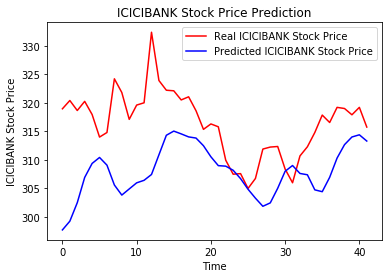

In [41]:
# Visualising the results
stock_name = "ICICIBANK"
print("Plotting Visualization")
plt.plot(real_stock_price, color = 'red', label = 'Real ' + stock_name + ' Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ' + stock_name +' Stock Price')
plt.title(stock_name +' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(stock_name +' Stock Price')
plt.legend()
plt.show()